# PCA

In [8]:
# import notebook.services.api.handlers
import pandas as pd

import utils
# from models.VAE import *

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
# clustering namespaces
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

from statsmodels.multivariate.pca import PCA

import numpy as np
# import tensorflow_probability as tfp
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from sklearn.manifold import TSNE
plt.rcParams['figure.figsize'] = (15, 12)
import warnings
warnings.filterwarnings('ignore')
save_dir = 'saved_models/tfp'

In [10]:
test_size = 0.2     # train-test split

# normal with subjective meassures = TRUE/FALSE
# dat, X_0, y_0, _, _, _, _ = load_data(group=group, test_size=test_size, sub=True) # subjectives = True
# dat, _, _, X, X_test, y, y_test = load_data(group=group, test_size=test_size, sub=False)

dat = pd.read_csv('../data/refined_U12_data.csv')

y_0 = dat['LZ']
dat = dat.drop(['AK', 'LZ'], axis=1).reset_index(drop=True)
X_0 = dat.iloc[:,:]


X, X_test, y, y_test = train_test_split(X_0, y_0, test_size=test_size, random_state=42, stratify=y_0)


X_0_names = list(X.columns)
X_names = ['Birthday', 'height', 'weight', 'SL20', 'GW','DR','BK','BJ','SKSC_TAK','SKSC_TEC','SKSC_KON','SKSC_PSY']
# ___ SCALING
df = X
scaler = StandardScaler().fit(X)
df = scaler.transform(df)

data = dat.copy()
scaler_data = StandardScaler().fit(data)
data = scaler_data.transform(data)

data = pd.DataFrame(data, columns=dat.columns)

# PCA

In [13]:
from sklearn.decomposition import PCA
#pca_scree = PCA(n_components = 0.75, svd_solver='full')
pca_scree = PCA(svd_solver='full')
pca_scree.fit(data)
reduced = pca_scree.transform(data)
data

,BirthYear,height,weight,SL20,GW,DR,BK,BJ,SKSC_TEC,SKSC_KON,SKSC_TAK,SKSC_PSY
0,-1.239463,-0.804558,4.330418e-15,0.761577,-0.121508,-1.393778,-1.445446,0.108275,-0.334789,0.305363,0.570381,-0.146489
1,-1.239463,-1.671440,4.330418e-15,-0.932821,-0.621493,-0.173767,-1.318373,-0.205561,1.173721,1.628139,1.526721,0.352958
2,-1.239463,1.218165,4.330418e-15,-1.748642,0.028487,-0.094201,0.811958,-0.519396,-0.837626,0.305363,-0.146874,0.352958
3,-1.239463,-0.804558,4.330418e-15,-0.054244,-1.296473,-0.889860,-0.511090,-0.205561,-0.334789,0.305363,-1.342300,0.352958
4,-1.239463,-1.237999,4.330418e-15,-1.183843,-1.371470,-1.937478,-1.041804,1.677452,1.173721,1.628139,2.004891,1.351853
...,...,...,...,...,...,...,...,...,...,...,...,...
10387,1.203727,2.085047,4.330418e-15,-0.054244,0.728466,1.258419,0.341043,-0.205561,1.676558,0.305363,0.809466,0.852406
10388,1.203727,0.640244,4.330418e-15,1.263621,1.078455,0.396455,0.415791,1.363616,0.670884,0.305363,0.809466,0.352958
10389,1.203727,-1.093519,4.330418e-15,-0.242510,-0.996482,2.040817,0.572763,1.049781,0.670884,0.305363,2.004891,0.352958
10390,1.203727,1.073685,4.330418e-15,0.259534,1.078455,0.396455,0.415791,-0.205561,0.168048,0.305363,0.570381,0.352958


In [14]:
#pca_scree.explained_variance_ratio_
pca_scree.explained_variance_

array([3.32829284, 1.5380173 , 1.31451823, 1.09683568, 0.99268512,
       0.83016025, 0.72665508, 0.66221942, 0.50658654, 0.44051181,
       0.34332054, 0.22135204])

Text(0.5, 1.0, 'Scree Plot')

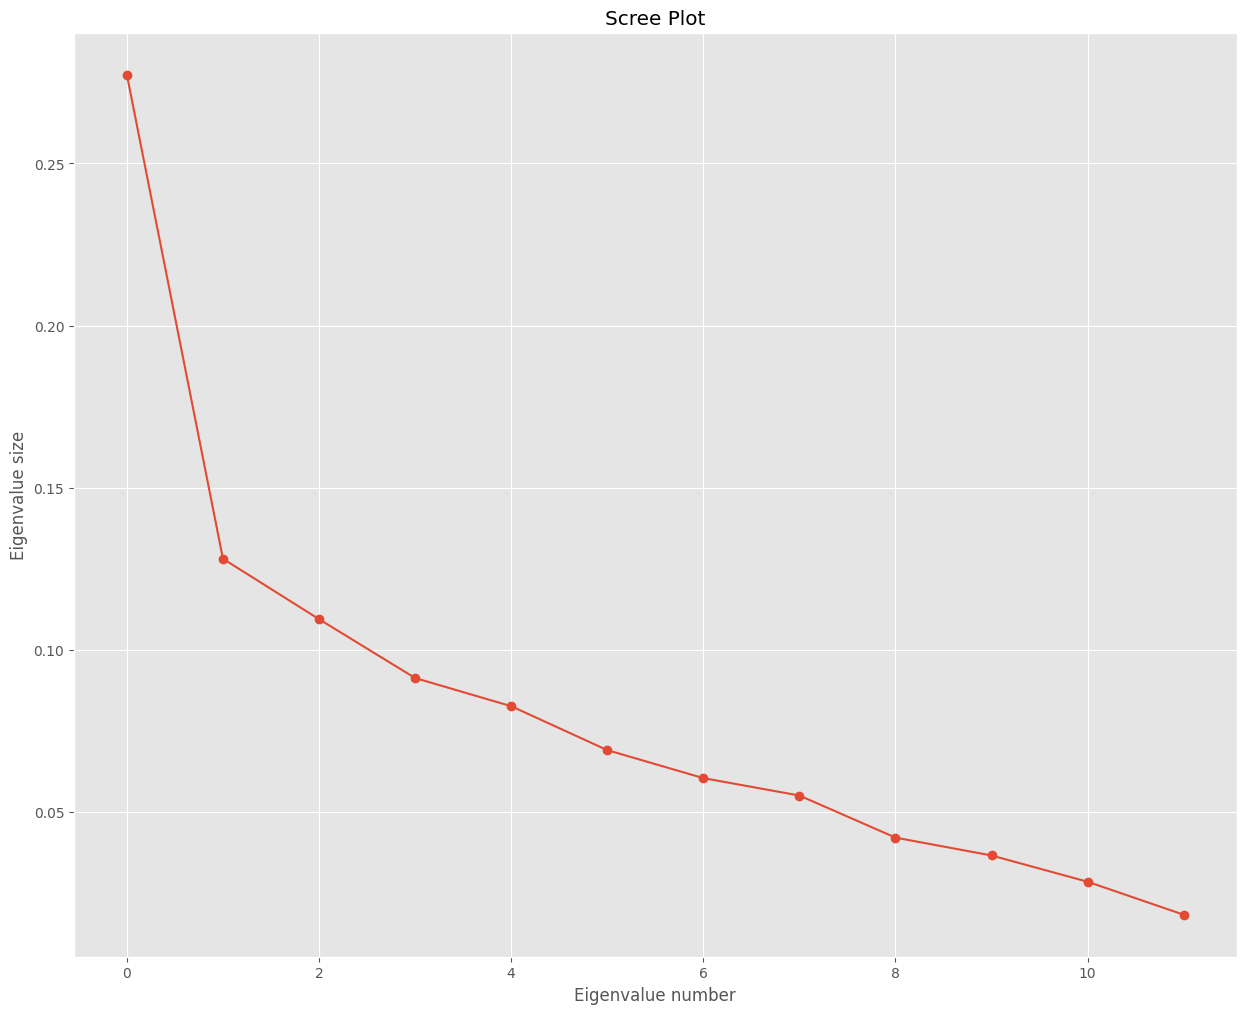

In [15]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(pca_scree.explained_variance_ratio_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [16]:
pca = PCA(n_components = 4, svd_solver='full',)
pca.fit(data)
reduced = pca.transform(data)
loadings = pd.DataFrame(pca.components_.T)

[Text(0.5, 1.0, 'PCA loadings (a)')]

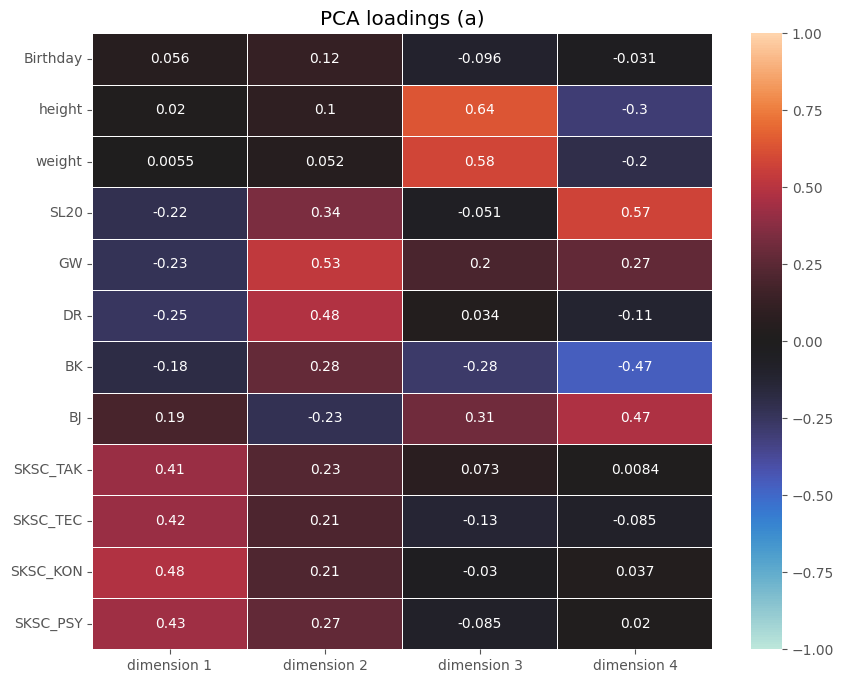

In [17]:
plt.subplots(figsize=(10,8))
sns.heatmap(data=loadings, annot=True, linewidths=0.5, vmin=-1, vmax=1, center=0,xticklabels=["dimension 1", "dimension 2","dimension 3","dimension 4"], yticklabels=X_names).set(title='PCA loadings (a)')

### Explained variance

In [18]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.6064136449436647)